In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc


print(f'numpy = {np.__version__}')
print(f'pandas = {pd.__version__}')
print(f'tensorflow = {tf.__version__}')

numpy = 1.21.6
pandas = 1.3.5
tensorflow = 2.8.0


In [ ]:
X_START = '20161001'
X_END = '20161231'
Y_START = '20170101'
Y_END = '20170131'

In [ ]:
def evaluate_pred(y_train, y_pred_train, y_test, y_pred_test):
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=lw, label='Train ROC (area = %0.2f)' % roc_auc_score(y_train, y_pred_train))
    plt.plot(fpr_test, tpr_test, color='lightblue', lw=lw, label='Test ROC (area = %0.2f)' % roc_auc_score(y_test, y_pred_test))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mini project csv file/bq-results-20220429-042912-1651206580008.csv')
data

,fullVisitorId,n_events,n_days,avg_events_per_day,bounces,avg_bounces_per_day,testset,revisited
0,1.027855e+13,1,1,1.0,NaN,NaN,0,0
1,2.042434e+13,1,1,1.0,NaN,NaN,0,0
2,1.524746e+14,1,1,1.0,NaN,NaN,1,0
3,1.740674e+14,2,2,1.0,NaN,NaN,0,0
4,3.347106e+13,1,1,1.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...
241164,9.999633e+18,2,1,2.0,2.0,2.0,0,0
241165,9.999761e+18,1,1,1.0,NaN,NaN,0,0
241166,9.999775e+18,1,1,1.0,1.0,1.0,1,0
241167,9.999801e+18,1,1,1.0,NaN,NaN,0,0


In [ ]:
data.describe()

,fullVisitorId,n_events,n_days,avg_events_per_day,bounces,avg_bounces_per_day,testset,revisited
count,2.411690e+05,241169.000000,241169.000000,241169.000000,132066.000000,132066.000000,241169.000000,241169.000000
mean,4.511185e+18,1.204972,1.130062,1.048257,1.102684,0.988672,0.299968,0.013522
std,3.072168e+18,1.010175,0.674469,0.237167,0.692215,0.183821,0.458245,0.115494
min,4.823595e+12,1.000000,1.000000,1.000000,1.000000,0.062500,0.000000,0.000000
25%,1.600008e+18,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,4.396425e+18,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,7.198965e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,9.999887e+18,98.000000,61.000000,7.000000,87.000000,6.000000,1.000000,1.000000


In [ ]:
data = data.drop(['fullVisitorId'], axis=1)

In [ ]:
data

,n_events,n_days,avg_events_per_day,bounces,avg_bounces_per_day,testset,revisited
0,1,1,1.0,NaN,NaN,0,0
1,1,1,1.0,NaN,NaN,0,0
2,1,1,1.0,NaN,NaN,1,0
3,2,2,1.0,NaN,NaN,0,0
4,1,1,1.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...
241164,2,1,2.0,2.0,2.0,0,0
241165,1,1,1.0,NaN,NaN,0,0
241166,1,1,1.0,1.0,1.0,1,0
241167,1,1,1.0,NaN,NaN,0,0


In [ ]:
X_train = data[data['testset']==0].drop(columns=['revisited', 'testset']).fillna(0.0)
y_train = data[data['testset']==0]['revisited']
X_test = data[data['testset']==1].drop(columns=['revisited', 'testset']).fillna(0.0)
y_test = data[data['testset']==1]['revisited']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(f'revisits in train = {sum(y_train)}, test = {sum(y_test)}')


(168826, 5) (168826,) (72343, 5) (72343,)
revisits in train = 2224, test = 1037


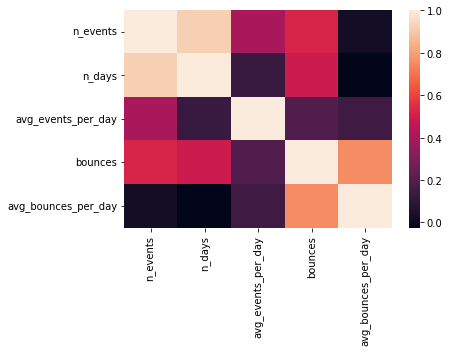

In [ ]:
sns.heatmap(X_train.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


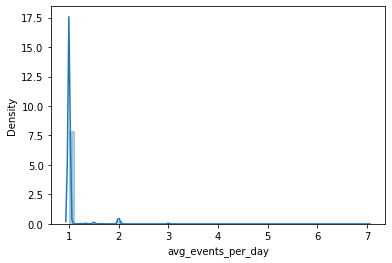

In [ ]:
sns.distplot(X_train.avg_events_per_day)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


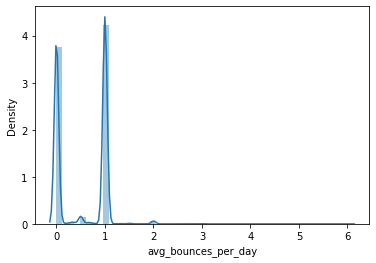

In [ ]:
sns.distplot(X_train.avg_bounces_per_day)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


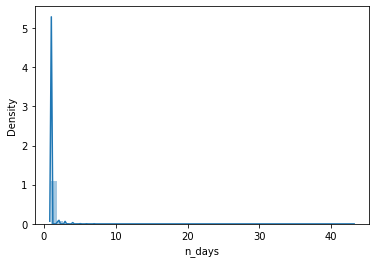

In [ ]:
sns.distplot(X_train.n_days)

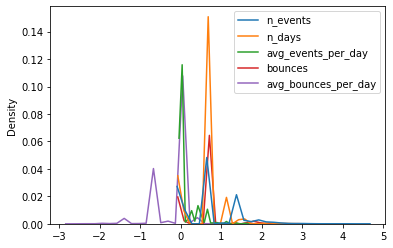

In [ ]:
sns.kdeplot(data=np.log(X_train),gridsize=27)

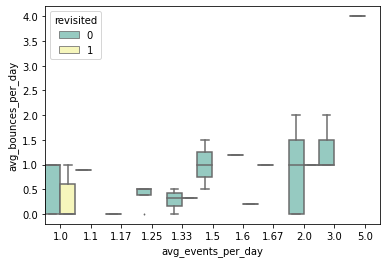

In [ ]:
sns.boxplot(x=round(X_train.avg_events_per_day[1:1000],2), y=X_train.avg_bounces_per_day[1:1000], 
            hue=y_train[1:1000], palette="Set3",width = 1, fliersize=1)

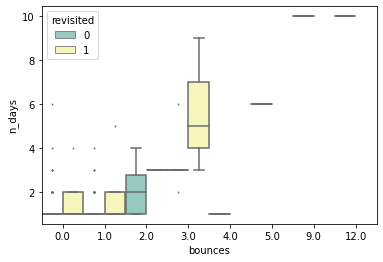

In [ ]:
sns.boxplot(x=round(X_train.bounces[1:1000],2), y=X_train.n_days[1:1000], 
            hue=y_train[1:1000], palette="Set3",width = 1, fliersize=1)

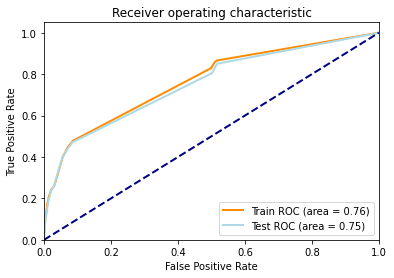

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)
evaluate_pred(y_train, logreg.predict_proba(X_train)[:, 1], y_test, logreg.predict_proba(X_test)[:, 1])

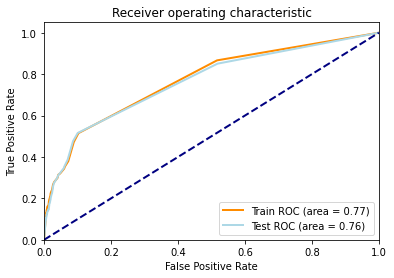

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_pred(y_train, nb.predict_proba(X_train)[:, 1], y_test, nb.predict_proba(X_test)[:, 1])

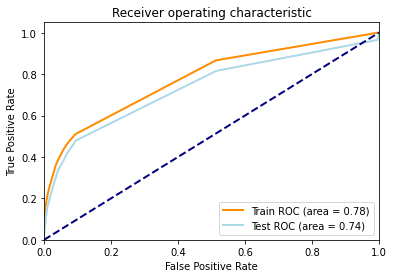

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
evaluate_pred(y_train, dtree.predict_proba(X_train)[:, 1], y_test, dtree.predict_proba(X_test)[:, 1])

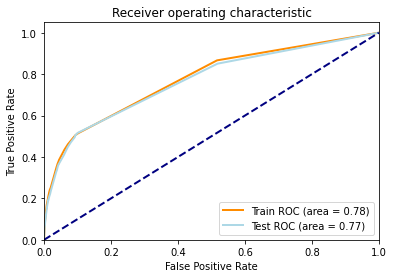

In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(32,64,32), max_iter=273, alpha=1e-5,
                   activation = 'relu',solver='adam',random_state=1)
nn.fit(X_train,y_train)
evaluate_pred(y_train, nn.predict_proba(X_train)[:, 1], y_test, nn.predict_proba(X_test)[:, 1])

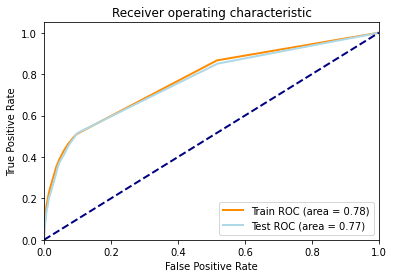

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)
evaluate_pred(y_train, model1.predict_proba(X_train)[:, 1], y_test, model1.predict_proba(X_test)[:, 1])

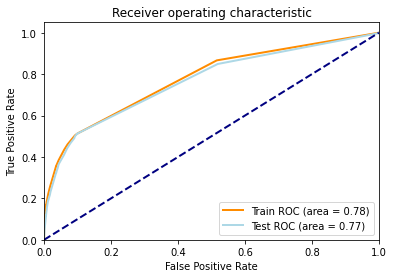

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=27,max_depth=10)
model2.fit(X_train, y_train)
evaluate_pred(y_train, model2.predict_proba(X_train)[:, 1], y_test, model2.predict_proba(X_test)[:, 1])

In [ ]:
pd.DataFrame({'feature': X_train.columns, 'impt': model1.feature_importances_}).set_index('feature').sort_values('impt', ascending=False)

,impt
feature,
n_days,0.628061
n_events,0.134858
avg_bounces_per_day,0.111970
bounces,0.063133
avg_events_per_day,0.061978


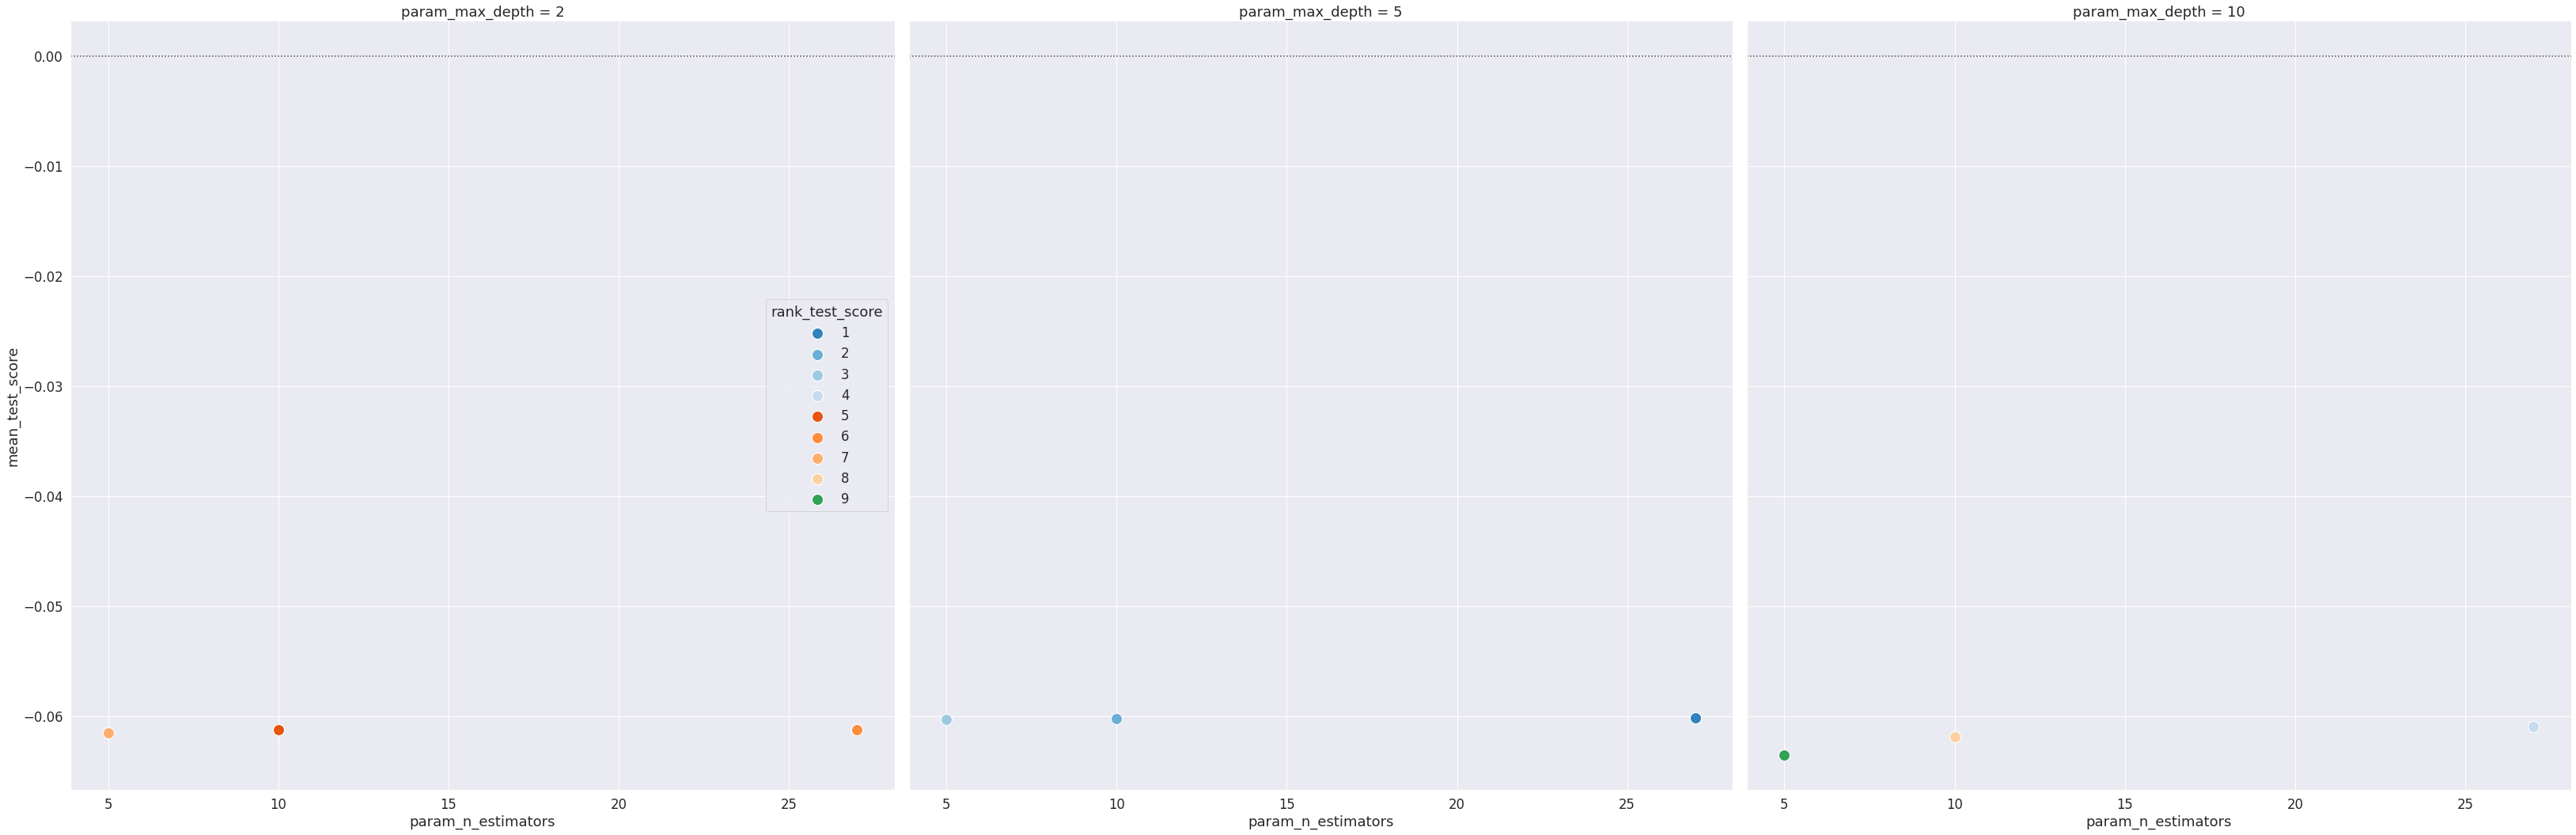

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def model_cv(model, param_grid, scoring):
  Tuned_Model = GridSearchCV(
        estimator=model, param_grid=param_grid, scoring=scoring, cv=5
    )

  Tuned_Model.fit(X_train, y_train)
  return Tuned_Model


def plot_mean_scores(Tuned_Model, col, x, y, name):

    Results = pd.DataFrame(Tuned_Model.cv_results_)
    Results_Best = Results.loc[Results.rank_test_score == 1]

    sns.set(font_scale=1.5)
    sns.set_style("darkgrid")
    col = col
    for col in col:
        grid = sns.FacetGrid(
            Results,
            col=col,
            hue="rank_test_score",
            palette="tab20c",
            legend_out=False,
            col_wrap=5,
            height=15,
        )

        # Draw a horizontal line to show the starting point
        grid.map(plt.axhline, y=0, ls=":", c=".5")

        # Draw marker on plot and decide what parameters to plot
        grid.map(sns.scatterplot, x, y, marker="o", s=200)

        # Adjust the arrangement of the plots
        grid.fig.tight_layout(w_pad=1)

        # Add legend to gird
        grid.add_legend()

    grid.savefig(name)

    
param_for_cv = {
    "n_estimators": [5, 10, 27],
    "max_depth" :[2,5,10],
}
model = RandomForestClassifier(random_state=0)

tuned_model = model_cv(model, param_for_cv, "neg_log_loss")

plot_mean_scores(
    tuned_model,
    ["param_max_depth"],
    "param_n_estimators",
    "mean_test_score",
    "DecisionTree",
)